# <div align="center"> <span style="color:red">Capacité numérique 1 </span>  </div> 

# <div align="center"> Les méthodes d'Euler </div> 
## <div align="center"> Application au filtrage passe-bas </div> 



## I- Méthode d'Euler.

### A - Méthode d'Euler explicite

Les méthodes d'Euler sont des procédures algorithmiques de résolution des problèmes de Cauchy, lorsque l'équation différentielle est d'ordre 1. 

Ces méthodes permettent de réaliser facilement un code numérique afin de trouver une solution approchée du problème. La précision de la solution étant fonction unique paramètre. \
On distingue deux types de méthode d'Euler : 
- la méthode explicite
- la méthode implicite\
On expose le principe des méthodes d'Euler explicite et implicite, puis on appliquera ces méthodes à la résolution d'un problème de Cauchy décrivant l'évolution de la tension aux bornes d'un condensateur. Ces soltuions seront comparées à la solution réelle et à un traitement harmonique. 

Considérons le problème suivant : 
$$\left\{\begin{eqnarray}
              y'(t) & = & f(t,y(t))  \\
              y(t=0) & = & y_0
\end{eqnarray}\right.$$

Les méthodes d'Euler ne permettront pas d'obtenir l'expression de $y(t)$ mais d'avoir une approximation du graphe de cette fonction sur un intervalle $[0,T]$.

Commençons en tout premier lieu par intégrer $y'(t)$ : 
$$ y(t) = \int f(t,y(t)dt $$

Pour calculer cette intégrale on subdivise l'intervalle $[0,T]$ en $N$ sous intervalles : $[t_0,t_1]$ ; $[t_1,t_2]$ ; ... ; $[t_{N-1},t_N]$.\
Avec $t_0 = 0$ et $t_N = T$. On ferra également attention à ce que $t_{k+1} - t_k = h$ soit une constante. 

Vient alors que  : 
$$ y(t_{k+1}) - y(t_k) = \int_{t_{k}}^{t_{k+1}}f(t,y(t))dt$$

La méthode **d'Euler explicite** revient à utiliser la méthode des rectangles à gauche pour estimer cette intégrale. Détaillons : 

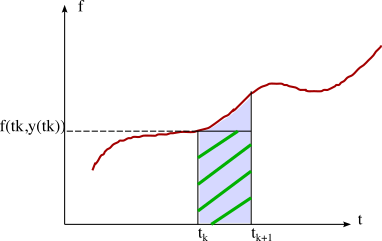

Considérons le graphe de $f(t,y(t))$. L'intégrale précédente revient à calculer l'air en bleue. La méthode des rectangles à gauche revient à calculer l'air achurée en vert. \
Alors on a l'approximation : 
$$ y(t_{k+1}) - y(t_k) \approx h.f(t_k,y(t_k))$$
Connaissant $y(t_0)$ on peut déduire à partir de cette expression : 
$$ y(t_1) = y(t_0) + h.f(t_0,y(t_0))$$
Et ainsi de suite sur tout l'intervalle $[0,T]$.\
On remarque alors que les erreurs successives se cumulent. 

### B - Méthode d'Euler implicite.

La méthode **d'Euler implicite** revient à utiliser la méthode des rectangles à droite pour estimer cette intégrale. Détaillons : 

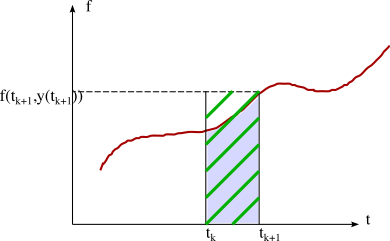

Cette fois ci on fait l'approximation suivante : 
$$ y(t_{k+1}) - y(t_k) = h.f(t_{k+1},y(t_{k+1})$$

Si la méthode d'Euler explicite sous-estime légèrement l'intégrale, la méthode d'Euler implicite la sur-estime. On remarque également que pour une équation différentielle linéaire il suffit d'appliquer un décalage d'indice pour passer d'une méthode à l'autre. 

### C - Mise en oeuvre. Filtrage linéaire passe-bas.

Considérons l'équation différentielle descriptive de l'évolution du système : 

$$ \frac{ds}{dt} + \frac{s}{\tau} = \frac{H_0.e}{\tau}$$

avec $\tau = \frac{1}{\omega_c} = \frac{1}{2\pi.f_c}$

Si en plus on adjoint la condition initiale : $s(t=0) = 0$ alors le problème suivant, appelé **problème de Cauchy**, possède une unique solution. 

$$\left\{\begin{eqnarray}
              \frac{ds}{dt} + \frac{s}{\tau} &=& \frac{H_0.e}{\tau}  \\
              s(t=0) &=& 0
\end{eqnarray}\right.$$

On connait déjà la solution de ce probème de Cauchy. Supposons que $e(t)$ soit un échelon de tension : 
$$\left\{\begin{eqnarray} 
        e(t) &=& 0  \; \text{si} \; t< 0\\
        e(t) &=& E \; \text{si} \; t \geq 0
   \end{eqnarray}\right.$$
   
   $s(t) = E(1-exp(-t/\tau))$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
H0 = 1.0
fc = 1000.0

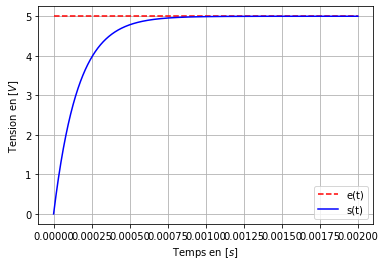

In [8]:
tmin = 0.0
tmax = 0.002

tau = 1/(2*np.pi*fc)

t = np.linspace(tmin,tmax,1000)

E = 5.0

s = E*(1 - np.exp(-t/tau))

plt.figure()
plt.plot([tmin,tmax],[E,E],'r--',label='e(t)')
plt.plot(t,s,'b-',label='s(t)')
plt.grid(True)
plt.xlabel('Temps en $[s]$')
plt.ylabel('Tension en $[V]$')
plt.legend(loc = 'best')
plt.show()
plt.close()


La méthode d'Euler explicite est un algorithme permettant de résoudre une équation différentiel d'ordre 1 en exploitant la définition de la dérivée d'une fonction en un point.   
En un point $t = a$ :
$$ \frac{ds}{dt}(t=a) = \lim_{dt\rightarrow 0}\frac{s(a+dt) - s(a)}{dt}$$

A la fin on veut pouvoir tracer le graphe de $s(t)$ fonction de $t$. Identifions alors la nature numérique des différents objets :
1. $s(t)$ est une liste de `float` dont les éléments sont notés `s[i]`.
2. $t$ est également une liste de `float`dont les éléments sont noté `t[i]`.
3. $dt$ est un `float` choisi et tel que `dt = t[i+1] - t[i]`.
4. $e(t)$ est une liste de `float`dont les éléments sont notés `e[i]`. 
5. $\tau$ et $H_0$ sont des `float`.

L'algorithme d'Euler explicite consiste alors à donner une écriture approché de l'équation différentielle sous la forme : 
$$ \frac{s[i+1] - s[i]}{dt} + \frac{s[i]}{\tau} = \frac{H_0.e[i]}{\tau}$$
Numériquement cette approximation est d'autant plus fidèle que $dt$ est petit. Cependant cela augmente la durée du calcul numérique.

Revenons à l'équation différentielle. Celle-ci peut s'écrire sous la forme : 
$$ \dfrac{ds}{dt} = \dfrac{1}{\tau}(H_0.e - s) = f(e,s)$$

1. Ecrire une fonction `Ordre_un` prenant en arguement deux listes et deux réels et retournant la fonction $f(e,s)$ définie ci-dessus.

In [5]:
def Ordre_un()

2. Ecrire une fonction `Euler_exp` prenant en argument deux listes, ainsi que l'ensemble des paramètres permettant de mettre en oeuvre l'algorithme d'Euler explicite et retournant une liste de date et `s[i]`.   Vous utiliserez une boucle `while` pour programmer la méthode d'Euler.

3. Créer une liste `e[i]` contenant $100$ valeurs et permettant de représenter $e(t)$ sous forme d'un échelon de tension $E = 5,0 \; V$.

4. Ecrire un code permettant de représenter sur un même graphe $e(t)$ et $s(t)$ déterminé par la méthode d'Euler pour `N = 100`.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


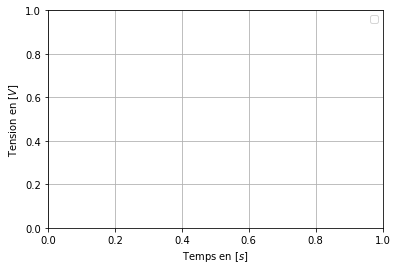

In [3]:

plt.figure()

plt.grid(True)
plt.xlabel('Temps en $[s]$')
plt.ylabel('Tension en $[V]$')
plt.legend(loc='best')




5. Comparer la précision de la méthode d'Euler pour `N = 50`; `N = 100`; `N = 1000`et `N = 10 000`.

In [4]:


plt.figure()


plt.show()
plt.close()

<Figure size 432x288 with 0 Axes>

6. Reprendre toute l'étude précédente pour $e(t) = 5,0.\sin(2\pi f t)$ avec $f = 5000 \; Hz$.

In [9]:
N = 1000
t1 = np.linspace(tmin,tmax,N)




plt.figure()


plt.show()
plt.close()


<Figure size 432x288 with 0 Axes>

7. Ecrire une fonction `Euler_imp` prenant en argument deux listes, ainsi que l'ensemble des paramètres permettant de mettre en oeuvre l'algorithme d'Euler implicite et retournant une liste de date et `s[i]`.   Vous utiliserez une boucle `while` pour programmer la méthode d'Euler.

In [24]:
def Euler_imp
    

In [10]:
E = 5.0
N = 100
e = np.linspace(E,E,N)



plt.figure()


plt.show()
plt.close()


<Figure size 432x288 with 0 Axes>

8. Ecrire un algorithme permettant de comparer pour un même nombre de point d'intégration `N`la méthode d'Euler implicite, explicite et la solution reélle. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


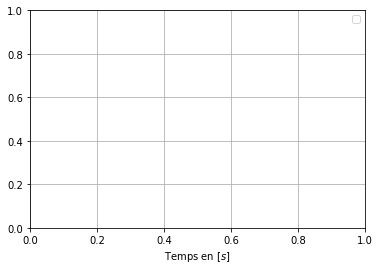

In [11]:
N = 1000



plt.figure()


plt.grid(True)
plt.xlabel('Temps en $[s]$') 
plt.legend(loc='best')
plt.show()
plt.close()

## II- Application au filtrage passe-bas.

### A- Etude de la fonction de transfert

   Un filtre passe-bas peut être représenter par sa fonction de transfert harmonique : 

 $$\underline{H} =\frac{H_0}{1+j\frac{\omega}{\omega_c}}$$

On propose dans un premier temps de réaliser un petit programme permettant de tracer le diagramme de Bode d'un tel filtre pour : $f_c = 1000 \; Hz$ et $H_0 = 1$

7. Construire une liste de $N = 100000$ valeurs de fréquences $f$ comprises entre $f_{min} = 10 \; Hz$ et $f_{max} = 100000 \; Hz$. 

8. Utiliser la liste `f=np.linspace(fmin,fmax,N)` ainsi créée pour construire la liste des valeurs complexes de $\underline{H}$.
On rappelle que l'imaginaire pur s'écrit `1j`.

9. Utiliser la fonctions `np.abs()` pour calculer la liste des modules de la fonction de transfert. Utiliser les fonctions trigonométrique du module `numpy`pour calculer la liste des phases. 

10. En vous appuyant sur le code suivant réaliser une représentation graphique du diagramme de Bode du filtre passe-bas définit plus haut. Vous commenterez chaque ligne du code suivant en indiquant leur utilité. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


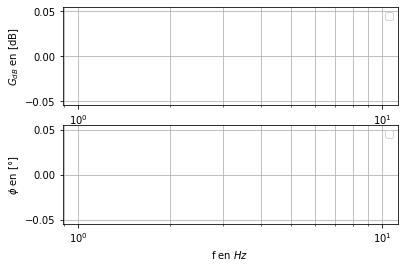

In [12]:
plt.subplot(211)
plt.plot()
plt.xscale('log')
plt.grid(True,'both')
plt.legend(loc='best')
plt.xlabel('f en $Hz$')
plt.ylabel('$G_{dB}$ en [dB]')

plt.subplot(212)
plt.plot()
plt.xscale('log')
plt.grid(True,'both')
plt.legend(loc='best')
plt.xlabel('f en $Hz$')
plt.ylabel('$\phi$ en $[°]$')
plt.show()
plt.close()

**On  souhaite maintenant étudier numériquement l'effet de ce filtre sur une tension créneau périodique. Pour cela on donne une représentation de cette tension.**

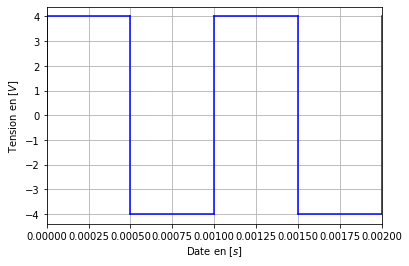

In [35]:
Emax = 4.0
Emin = -4.0
T2 = 1.0e-3/2.0

plt.figure()
plt.plot([0.0,T2],[Emax,Emax],'b-')
plt.plot([T2,2*T2],[Emin,Emin],'b-')
plt.plot([2*T2,3*T2],[Emax,Emax],'b-')
plt.plot([3*T2,4*T2],[Emin,Emin],'b-')
plt.plot([0.0,0.0],[0.0,Emax],'b-')
plt.plot([T2,T2],[Emax,Emin],'b-')
plt.plot([2*T2,2*T2],[Emin,Emax],'b-')
plt.plot([3*T2,3*T2],[Emax,Emin],'b-')
plt.plot([4*T2,4*T2],[Emin,Emax],'b-')
plt.grid(True)
plt.ylabel('Tension en $[V]$')
plt.xlabel('Date en $[s]$')
plt.xlim(0.0,2.0e-3)
plt.show()
plt.close()

La décomposition en série de Fourier d'une tension périodique impaire créneau d'amplitude $E$ et de fréquence $f_0$ est donnée par :

$$ e(t) = \frac{4.E}{\pi}\sum_{k=0}^\infty \frac{1}{2k+1}\sin(2.\pi.(2k+1).f_0.t)$$

11. A l'aide d'un programme python reconstruire par supperposition des 100 premières harmoniques, une tension créneau comme celle représentée sur le chronogramme précédent. On utilisera une boule `for`pour créer une listte des 100 premières harmoniques et la fonction `np.sum` pour réaliser la supperposition. 

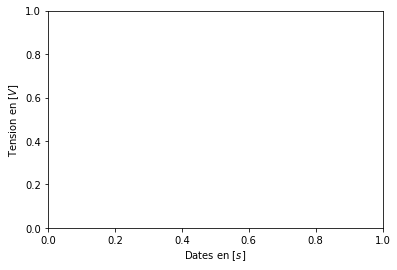

In [13]:


plt.figure()

plt.xlabel('Dates en $[s]$')
plt.ylabel('Tension en $[V]$')
plt.show()
plt.close()

12. Représenter le spectre de cette tension $e(t)$ en fréquence pour les 9 premières harmoniques.

NameError: name 'f0' is not defined

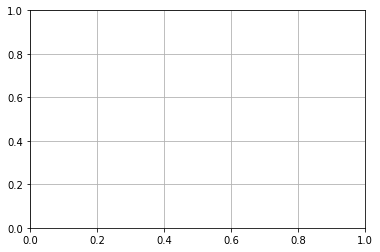

In [14]:


plt.figure()

plt.grid(True)
plt.xlim(0,17*f0)
plt.xlabel('Fréquence en $[Hz]$')
plt.ylabel('Amplitude en $[V]$')
plt.show()
plt.close()

13. En utilisant les listes des harmoniques que vous venez de créer, écrire une routine python permettant de mettre en évidance l'effet du filtre passe-bas précédent sur la tension créneau étudiée. 

In [15]:


plt.figure()


plt.show()
plt.close()



<Figure size 432x288 with 0 Axes>

14. Par modification d'un paramètre, montrer qu'à "haute-fréquence" le filtre passe-bas se comporte comme un intégrateur. Représenter alors le spectre de la tension de sortie. 

In [16]:


plt.figure()


plt.show()
plt.close()


<Figure size 432x288 with 0 Axes>

### B- Utilisation de l'équation différentielle.

L'étude précédente de la fonction de transfert peut être menée, comme précédemment, à partir de l'équation différentielle. Pour cela il suffit d'utiliser la fonction $e(t)$ définie par synthèse spectrale.

In [17]:


plt.figure()


plt.show()
plt.close()

<Figure size 432x288 with 0 Axes>